### Sliding Window

This notebook will read in an image, slide a window along it, and compute the average pixel value in the window.

Simple. I hope.

Author: Nate Burley

Image shape: (256, 256, 3)


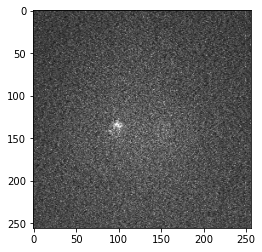

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in
img = cv2.imread('data/0_7-2.jpg')
print("Image shape: {}".format(img.shape))

# Plot the image
plt.imshow(img)
plt.show()

As a test, we'll grab the region around the dot:

Mean pixel value: 116.168


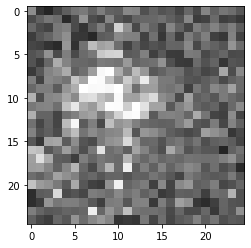

In [36]:
# Slice the image around the white dot
top_left_square = img[125:150, 90:115]
avg_pix_val = np.mean(top_left_square)
print("Mean pixel value: {}".format(avg_pix_val))
plt.imshow(top_left_square)
plt.show()

Now that we know how to select a region of the image, we'll loop through with variable box and step sizes:

In [38]:
# Set parameters
y_size = img.shape[0]
x_size = img.shape[1]
x_index = 0
y_index = 0
box_width = 16
step_size = 1
mean_pixel_values = {}

while (y_index + step_size + box_width) <= y_size:
    # Loop through, first horizontally
    while (x_index + step_size + box_width) <= x_size:
        # Get the region, and the mean pixel value
        sub_img = img[x_index:(x_index+box_width), y_index:(y_index+box_width)]
        top_left = (y_index, x_index)
        mean_pix_val = np.mean(sub_img)
        mean_pixel_values[top_left] = mean_pix_val
        print("Mean pixel value at ({},{}): {}".format(y_index, x_index, mean_pix_val))

        # Update the indices
        x_index += step_size
    x_index = 0
    y_index += step_size

(237,238): 73.55078125
Mean pixel value at (237,239): 73.3515625
Mean pixel value at (238,0): 65.4453125
Mean pixel value at (238,1): 65.3984375
Mean pixel value at (238,2): 65.046875
Mean pixel value at (238,3): 64.20703125
Mean pixel value at (238,4): 64.5390625
Mean pixel value at (238,5): 63.90234375
Mean pixel value at (238,6): 63.4921875
Mean pixel value at (238,7): 63.75
Mean pixel value at (238,8): 63.54296875
Mean pixel value at (238,9): 63.92578125
Mean pixel value at (238,10): 64.42578125
Mean pixel value at (238,11): 64.32421875
Mean pixel value at (238,12): 64.43359375
Mean pixel value at (238,13): 65.25
Mean pixel value at (238,14): 66.015625
Mean pixel value at (238,15): 66.484375
Mean pixel value at (238,16): 66.76953125
Mean pixel value at (238,17): 66.71875
Mean pixel value at (238,18): 67.05859375
Mean pixel value at (238,19): 67.10546875
Mean pixel value at (238,20): 66.49609375
Mean pixel value at (238,21): 66.73828125
Mean pixel value at (238,22): 67.21484375
Mean

To get a sense of how many boxes there are, we'll find the max average pixel value in the regions, and plot a histogram, to estimate an approximate value to use as the threshold for determining if a region contains a dot or not:

In [39]:
# Find the max value, and the "box index" that corresponds to that value
max_box = max(mean_pixel_values, key=mean_pixel_values.get)
print("Corner of box: {}".format(max_box))

Corner of box: (90, 130)


Let's display this box:

Max box: (90, 130), bottom right: (106, 146)


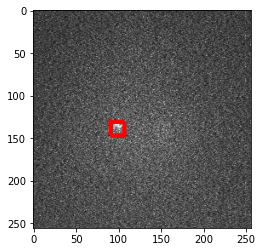

In [41]:
# Get the coordinates
top_left = max_box
bottom_right = (top_left[0] + box_width, top_left[1] + box_width)
print("Max box: {}, bottom right: {}".format(top_left, bottom_right))

# Draw the box
img_with_box = cv2.rectangle(img, top_left, bottom_right, color=(255,0,0), thickness=1)
plt.imshow(img_with_box)
plt.show()